In [7]:
# Importing the required Libraries

import cv2
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

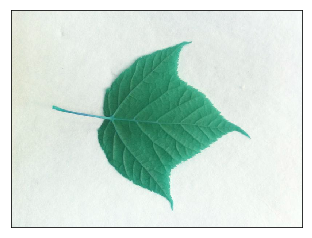

In [8]:
# Opening the original RGB Image

image_RGB = cv2.imread('sample.jpg', 1)
plt.imshow(image_RGB)
plt.xticks([]), plt.yticks([])
plt.show()

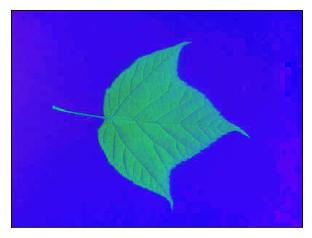

In [9]:
# Converting the RGB Image into HSV Space 
# It is done because the saturation and values of HSV Space are useful for distinguishing the leaf pixels from the background

image_HSV = cv2.cvtColor(image_RGB, cv2.COLOR_BGR2HSV)
plt.imshow(image_HSV)
plt.xticks([]), plt.yticks([])
plt.show()

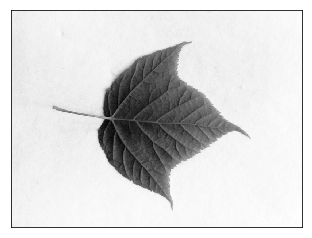

In [10]:
# Gray Scaled Image

image_GRAY = cv2.cvtColor(image_RGB, cv2.COLOR_BGR2GRAY)
plt.imshow(image_GRAY, cmap='Greys_r')
plt.xticks([]), plt.yticks([])
plt.show()

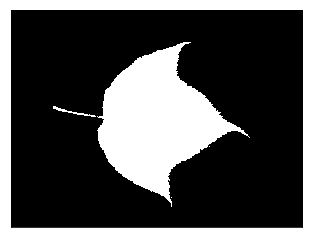

In [11]:
# Finally Segmenting it using "Watershed Algorithm"

gray = cv2.cvtColor(image_RGB, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.imshow(thresh, cmap='Greys_r')
plt.xticks([]), plt.yticks([])
plt.show()

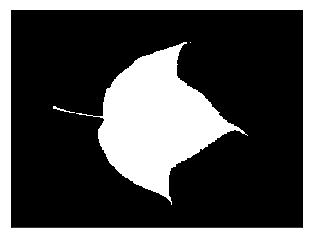

In [12]:
# Noise removal using "Morphological Closing"

# Closing operation 
kernel = np.ones((3, 3), np.uint8) 
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, 
                            kernel, iterations = 2) 

# Background area using Dialation 
bg = cv2.dilate(closing, kernel, iterations = 1) 
  
# Finding foreground area 
dist_transform = cv2.distanceTransform(closing, cv2.DIST_L2, 0) 
ret, fg = cv2.threshold(dist_transform, 0.01
                        * dist_transform.max(), 255, 0) 
  
plt.imshow(fg, cmap='Greys_r') 
plt.xticks([]), plt.yticks([])
plt.show()

---